In [31]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

% matplotlib inline

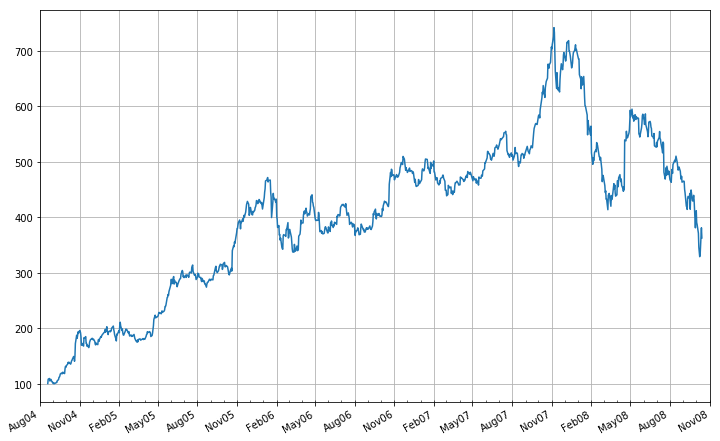

In [32]:
# Define periodicities later used to set tick mark locations
quarters = mdates.MonthLocator(interval=3)
#years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
xtickFmt = mdates.DateFormatter('%b%y')

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
fp = '/accounts/ekarakoy/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/sample_data/goog.npz'
r = np.load(fp)['price_data'].view(np.recarray)

# set up basic plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(r.date, r.adj_close)
ax.grid(True)

# format the ticks
ax.xaxis.set_major_locator(quarters) # major ticks at quarters
ax.xaxis.set_major_formatter(xtickFmt)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_tick_params(which='minor', direction='in')

# Set x-limits to make plot look "nice"
datemin = np.datetime64(r.date[0], 'Y') + np.timedelta64(7, 'M')
datemax = np.datetime64(r.date[-1], 'Y') + np.timedelta64(10, 'M')
ax.set_xlim(datemin, datemax)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()